In [12]:
# import the the essentials
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# let's look at the data first, and lets start with the very first year available


In [13]:
df=pd.read_csv('archive/2015_data.csv')

/var/folders/2n/x1v3x_n157b9sbshshb8yspc0000gn/T/ipykernel_4512/3678110354.py:1: DtypeWarning: Columns (40,41,42,43,61,62,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('archive/2015_data.csv')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718198 entries, 0 to 2718197
Data columns (total 77 columns):
 #   Column                                                  Dtype  
---  ------                                                  -----  
 0   resident_status                                         int64  
 1   education_1989_revision                                 float64
 2   education_2003_revision                                 float64
 3   education_reporting_flag                                int64  
 4   month_of_death                                          int64  
 5   sex                                                     object 
 6   detail_age_type                                         int64  
 7   detail_age                                              int64  
 8   age_substitution_flag                                   float64
 9   age_recode_52                                           int64  
 10  age_recode_27                                         

In [15]:
df.describe()

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,detail_age_type,detail_age,age_substitution_flag,age_recode_52,age_recode_27,...,record_condition_18,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode
count,2.718198e+06,73043.000000,2.645155e+06,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06,13.0,2.718198e+06,2.718198e+06,...,0.0,0.0,0.0,2.718198e+06,12288.0,26149.000000,2.718198e+06,2.718198e+06,2.718198e+06,2.718198e+06
mean,1.226700e+00,12.602371,3.718700e+00,9.731282e-01,6.381973e+00,1.025770e+00,7.345519e+01,1.0,4.008087e+01,2.019971e+01,...,NaN,NaN,NaN,1.696986e+00,1.0,1.753375,1.267771e+00,1.206286e+00,1.126411e+02,5.930529e+00
std,4.993832e-01,9.516661,1.985368e+00,1.617089e-01,3.520758e+00,3.105674e-01,2.230170e+01,0.0,4.621407e+00,3.850541e+00,...,NaN,NaN,NaN,5.282618e+00,0.0,0.431055,6.573266e-01,5.712140e-01,6.726954e+01,1.197932e+00
min,1.000000e+00,0.000000,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.0,1.000000e+00,1.000000e+00,...,NaN,NaN,NaN,1.000000e+00,1.0,1.000000,1.000000e+00,1.000000e+00,1.000000e+02,1.000000e+00
25%,1.000000e+00,11.000000,3.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,6.300000e+01,1.0,3.800000e+01,1.800000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
50%,1.000000e+00,12.000000,3.000000e+00,1.000000e+00,6.000000e+00,1.000000e+00,7.700000e+01,1.0,4.100000e+01,2.100000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
75%,1.000000e+00,13.000000,5.000000e+00,1.000000e+00,9.000000e+00,1.000000e+00,8.700000e+01,1.0,4.300000e+01,2.300000e+01,...,NaN,NaN,NaN,1.000000e+00,1.0,2.000000,1.000000e+00,1.000000e+00,1.000000e+02,6.000000e+00
max,4.000000e+00,99.000000,9.000000e+00,1.000000e+00,1.200000e+01,9.000000e+00,9.990000e+02,1.0,5.200000e+01,2.700000e+01,...,NaN,NaN,NaN,7.800000e+01,1.0,2.000000,3.000000e+00,4.000000e+00,9.980000e+02,9.000000e+00


In [16]:
df['39_cause_recode'].isna().sum()

0

In [17]:
df['39_cause_recode'].unique()

array([22,  8, 17, 41, 21, 37, 39, 36, 15, 40, 24, 28, 27, 26, 30, 20,  9,
       34, 31,  6,  7, 12,  3, 13, 29, 16, 14, 23, 33, 10, 38,  5, 25, 35,
       42, 11,  1,  2, 32])

In [18]:
# we first need to convert things as a target colum

## Cause of death in '39_cause_recorde'
    it seems that n>38 is unnatural deaths

In [19]:
37<=39

True

In [20]:
df['unnatural']=1
df.loc[df['39_cause_recode']<=38,'unnatural']=0

In [21]:
df.sample(5)

,resident_status,education_1989_revision,education_2003_revision,education_reporting_flag,month_of_death,sex,detail_age_type,detail_age,age_substitution_flag,age_recode_52,...,record_condition_19,record_condition_20,race,bridged_race_flag,race_imputation_flag,race_recode_3,race_recode_5,hispanic_origin,hispanic_originrace_recode,unnatural
1719382,1,NaN,6.0,1,3,M,1,82,NaN,42,...,NaN,NaN,1,NaN,NaN,1,1,100,6,0
1214877,1,NaN,4.0,1,1,F,1,81,NaN,42,...,NaN,NaN,1,NaN,NaN,1,1,100,6,0
1272383,3,NaN,4.0,1,5,F,1,87,NaN,43,...,NaN,NaN,1,NaN,NaN,1,1,100,6,0
108460,1,NaN,6.0,1,5,M,1,63,NaN,38,...,NaN,NaN,2,NaN,NaN,3,2,100,7,0
2658554,1,16.0,NaN,0,12,F,1,61,NaN,38,...,NaN,NaN,1,NaN,NaN,1,1,100,6,0


In [22]:
df['unnatural'].value_counts(normalize=True)

0    0.933848
1    0.066152
Name: unnatural, dtype: float64

### only 6 percent of the deaths are unnatural

In [23]:
for column in df.columns[:-1]:
    print(f'{column} has unique values :{ df[column].unique() } \n')

resident_status has unique values :[1 3 2 4] 

education_1989_revision has unique values :[nan 12. 16.  6. 17.  8. 14. 10.  7. 15.  9. 11.  5. 13.  0.  3. 99.  1.
  4.  2.] 

education_2003_revision has unique values :[ 3.  6.  5.  4.  9.  2.  1.  8.  7. nan] 

education_reporting_flag has unique values :[1 0] 

month_of_death has unique values :[ 1  2  3  4  5  6  7  8  9 10 11 12] 

sex has unique values :['M' 'F'] 

detail_age_type has unique values :[1 4 2 5 6 9] 

detail_age has unique values :[ 84  70  91  40  89  78  92  82  93  67  94  56  32  18  48  79  85  61
  72  86  98  66  62  60  43  90  76  65  80  51  71  95  49  99  64  68
  58  74  57  77  25  39  69  59  50  53  87  81  97 100  75  88  83  20
  24  73  19  54  63  26  13  52  46  30  33  23  45  41  44  42 104   7
   2  55   5   3  35  37  47  34  28  31  96  36   1  27  38  29  12   4
  22  21   6  11 101  14 107  16   8  15 102   9  17  10 103 106 109 105
 110 111 108 999 116 113 114 112 115] 

age_substitution_f

In [24]:
continuous_variables = ['education_2003_revision',
                     'month_of_death',
                     'age_recode_52',
                     'detail_age',
                     'day_of_week_of_death',
                     'activity_code']

In [25]:
categorical_variables = ['marital_status','resident_status','sex']

In [26]:
df[continuous_variables+categorical_variables].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2718198 entries, 0 to 2718197
Data columns (total 9 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   education_2003_revision  float64
 1   month_of_death           int64  
 2   age_recode_52            int64  
 3   detail_age               int64  
 4   day_of_week_of_death     int64  
 5   activity_code            float64
 6   marital_status           object 
 7   resident_status          int64  
 8   sex                      object 
dtypes: float64(2), int64(5), object(2)
memory usage: 186.6+ MB


In [27]:
for feature in continuous_variables+categorical_variables:
    print(f'{feature} has {df[feature].isna().sum()} missing values')

education_2003_revision has 73043 missing values
month_of_death has 0 missing values
age_recode_52 has 0 missing values
detail_age has 0 missing values
day_of_week_of_death has 0 missing values
activity_code has 2504519 missing values
marital_status has 0 missing values
resident_status has 0 missing values
sex has 0 missing values


#### it looks like activity_code has too many missing values, on the other hand we can impute education_2003_revision

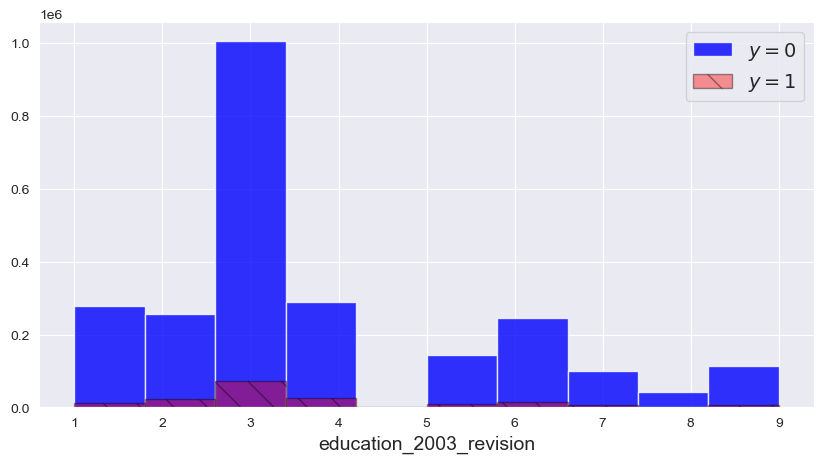

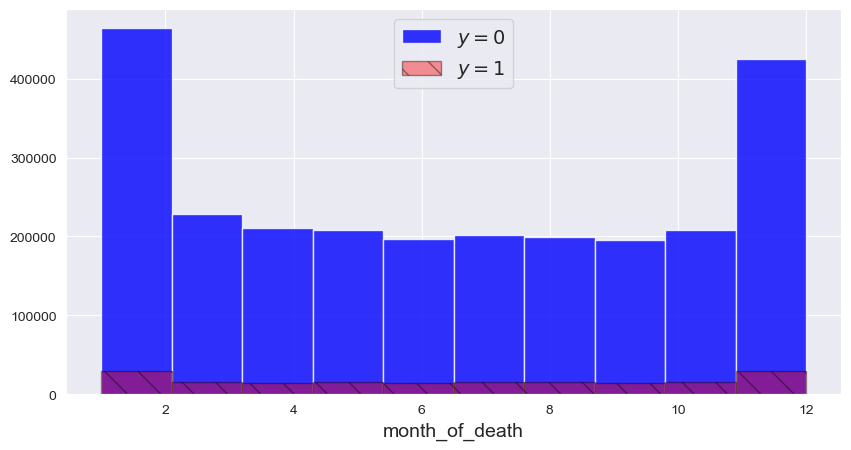

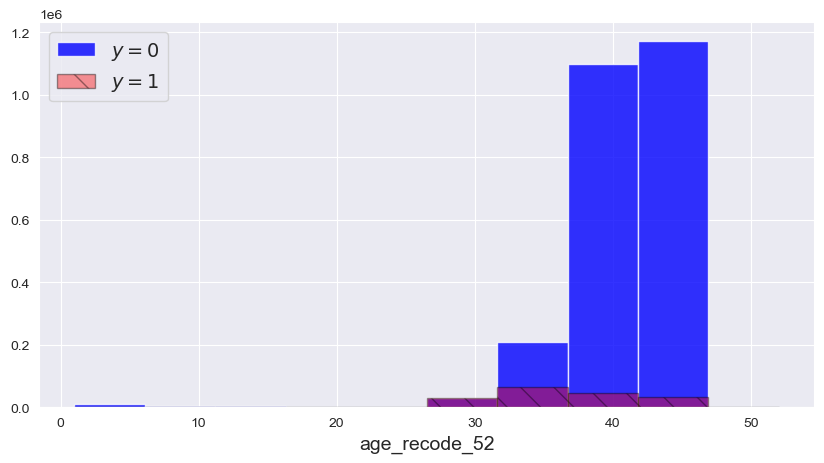

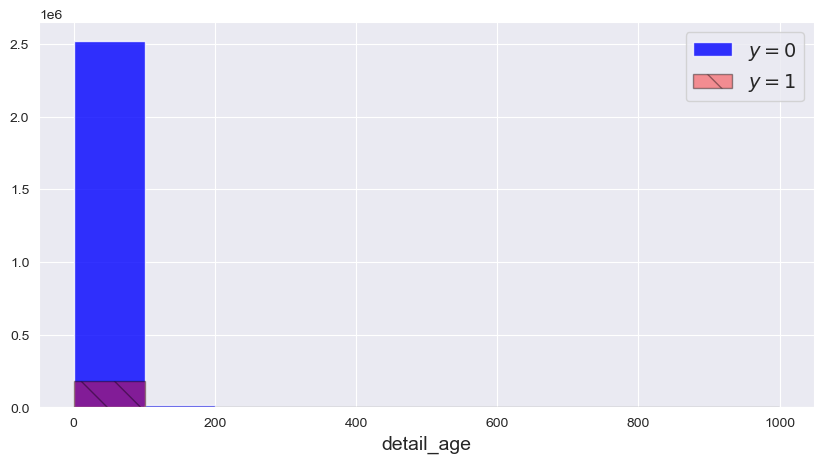

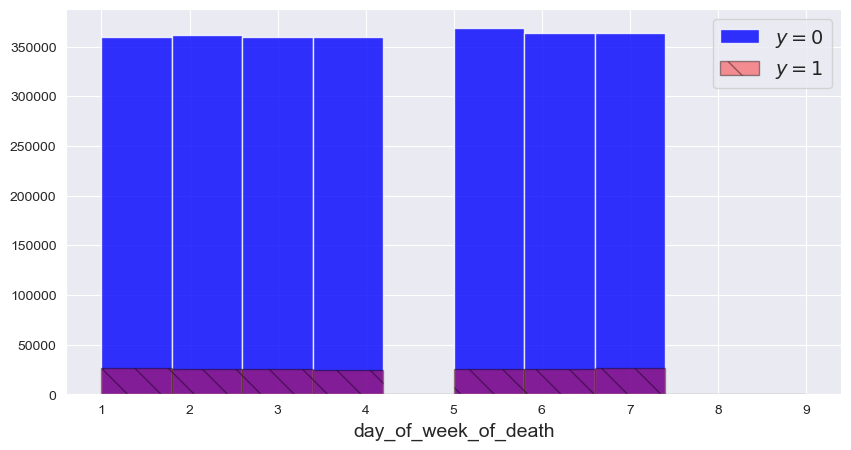

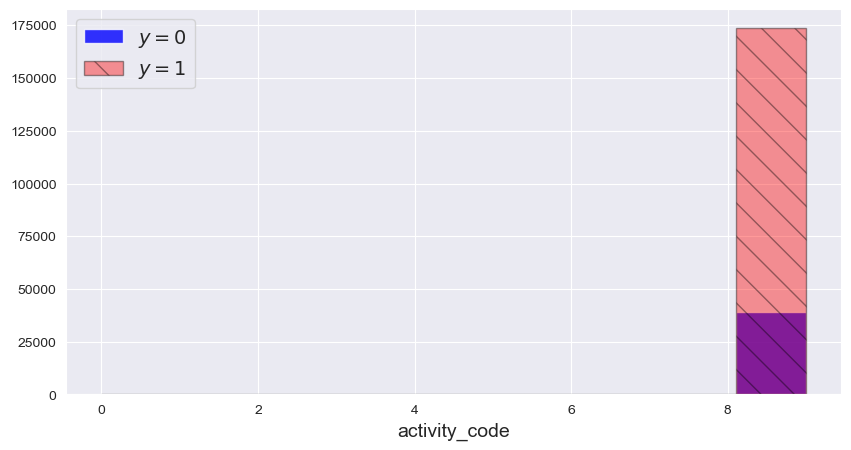

In [28]:
continuous_features=continuous_variables
target_column='unnatural'
for col in continuous_features:
    plt.figure(figsize=(10,5))


    plt.hist(df.loc[df[target_column]==0, col].values,
                color='blue',
                alpha=.8,
                label="$y=0$")

    plt.hist(df.loc[df[target_column]==1, col].values,
                color='red',
                alpha=.4,
                hatch = '\\',
                edgecolor='black',
                label="$y=1$")

    plt.xlabel(col, fontsize=14)
    plt.legend(fontsize=14)
    
    plt.show()

In [29]:
# it looks like age education and age_recorde_52 is useful

In [30]:
for col in df[categorical_variables]:
    if df[col].nunique() <=6:
        display(pd.crosstab(df[target_column], df[col], normalize='index'))

marital_status,D,M,S,U,W
unnatural,,,,,
0,0.153163,0.374182,0.112827,0.007044,0.352784
1,0.186315,0.292886,0.361062,0.012368,0.147369


resident_status,1,2,3,4
unnatural,,,,
0,0.809682,0.158637,0.029833,0.001848
1,0.788637,0.160633,0.045853,0.004877


sex,F,M
unnatural,,
0,0.504714,0.495286
1,0.332983,0.667017


### both of these definitely play a role 

In [31]:
continuous_features

['education_2003_revision',
 'month_of_death',
 'age_recode_52',
 'detail_age',
 'day_of_week_of_death',
 'activity_code']

In [32]:
# so for a simple model we can use 
features=['education_2003_revision','age_recode_52','sex','resident_status','marital_status']

## Data Processing

Imputing education column with mode is possible but considering the number of data points, it might be unnecessary for now
thus we will just drop the values

In [33]:
#in case it is ever needed

from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin


class EducationImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.SimpleImputer = SimpleImputer(strategy = 'most_frequent')

    def fit(self, X, y = None):
        self.SimpleImputer.fit(X['education_2003_revision'].values.reshape(-1,1))
        return self

    def transform(self, X, y = None):
        copy_X = X.copy()
        copy_X['education_2003_revision'] = self.SimpleImputer.transform(copy_X['education_2003_revision'].values.reshape(-1,1))
        return copy_X

imputer = EducationImputer()

In [34]:
df_temp=df[features+['unnatural']].dropna(subset=['education_2003_revision'])
del df
df=df_temp
df

,education_2003_revision,age_recode_52,sex,resident_status,marital_status,unnatural
0,3.0,42,M,1,M,0
1,6.0,40,M,1,M,0
2,3.0,44,F,1,W,0
3,3.0,34,F,1,S,1
4,5.0,43,F,1,W,0
...,...,...,...,...,...,...
2718193,1.0,1,M,1,S,0
2718194,9.0,35,F,1,U,0
2718195,9.0,32,M,4,U,0
2718196,9.0,42,M,4,U,0


we can also onehot code categorical_variables in advance as including this process into cv does not make sense considering the computation time

### One hot encoding the caterical variables

In [35]:
from sklearn.preprocessing import FunctionTransformer

In [36]:
def one_hot_encoder(df):
    list_of_features=categorical_variables #Fill here
    df_copy = df.copy()

    for feature in list_of_features:

        returned_features = sorted(list(set(df[feature])))
        returned_features_as_string = list(map(lambda x: str(x), returned_features))


        df_copy[returned_features_as_string] = pd.get_dummies(df_copy[feature])[returned_features]

    return df_copy.drop(columns = list_of_features)

one_hot_transformer = FunctionTransformer(one_hot_encoder)

In [37]:
df=one_hot_transformer.transform(df)

In [38]:
df

,education_2003_revision,age_recode_52,unnatural,D,M,S,U,W,1,2,3,4,F
0,3.0,42,0,0,1,0,0,0,1,0,0,0,0
1,6.0,40,0,0,1,0,0,0,1,0,0,0,0
2,3.0,44,0,0,0,0,0,1,1,0,0,0,1
3,3.0,34,1,0,0,1,0,0,1,0,0,0,1
4,5.0,43,0,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2718193,1.0,1,0,0,1,1,0,0,1,0,0,0,0
2718194,9.0,35,0,0,0,0,1,0,1,0,0,0,1
2718195,9.0,32,0,0,1,0,1,0,0,0,0,1,0
2718196,9.0,42,0,0,1,0,1,0,0,0,0,1,0


#### Time to split the data

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
df_train, df_test = train_test_split(df.copy(),
                                              shuffle=True,
                                              random_state=123,
                                              test_size=.1,
                                              stratify=df['unnatural'].values)

In [41]:
features=list(df.columns)
features.remove('unnatural')
features

['education_2003_revision',
 'age_recode_52',
 'D',
 'M',
 'S',
 'U',
 'W',
 '1',
 '2',
 '3',
 '4',
 'F']

## Model Selection

In [42]:
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [57]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve

/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Model 0 0th validation 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    444597
           1       0.00      0.00      0.00     31531

    accuracy                           0.93    476128
   macro avg       0.47      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 



/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 0th validation 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    444597
           1       0.03      0.00      0.01     31531

    accuracy                           0.93    476128
   macro avg       0.48      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 

Model 2 0th validation 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86    444597
           1       0.17      0.69      0.28     31531

    accuracy                           0.76    476128
   macro avg       0.57      0.73      0.57    476128
weighted avg       0.92      0.76      0.82    476128
 

Model 3 0th validation 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97    444597
           1       0.61      0.13      0.22     31531

    accuracy                           0.94    476128
   macro avg       0.77      0.56      0.59    47

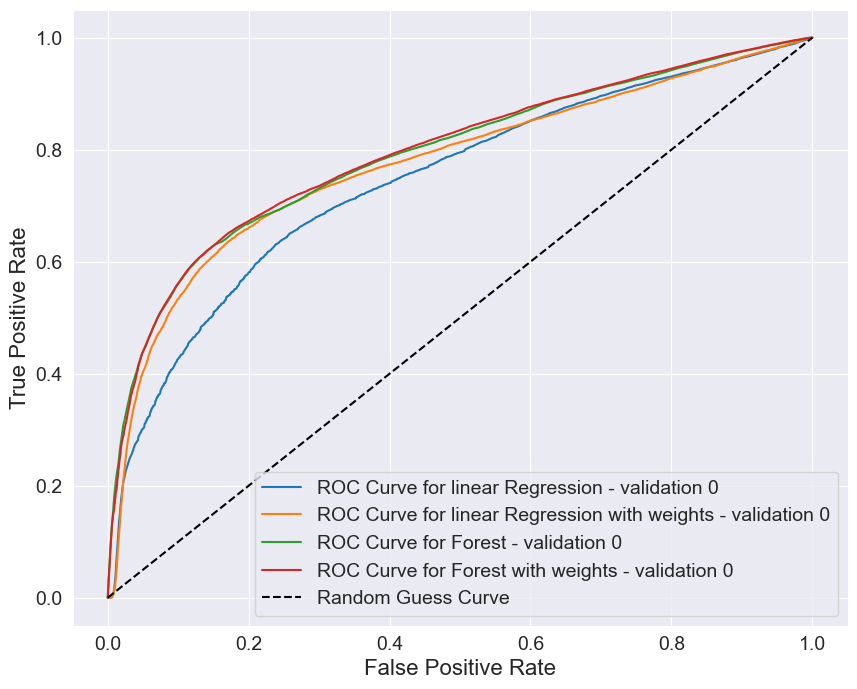

/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Model 0 1th validation 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    444597
           1       0.00      0.00      0.00     31531

    accuracy                           0.93    476128
   macro avg       0.47      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 



/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 1th validation 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    444597
           1       0.02      0.00      0.00     31531

    accuracy                           0.93    476128
   macro avg       0.48      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 

Model 2 1th validation 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86    444597
           1       0.17      0.69      0.28     31531

    accuracy                           0.76    476128
   macro avg       0.57      0.73      0.57    476128
weighted avg       0.92      0.76      0.82    476128
 

Model 3 1th validation 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97    444597
           1       0.62      0.13      0.22     31531

    accuracy                           0.94    476128
   macro avg       0.78      0.56      0.59    47

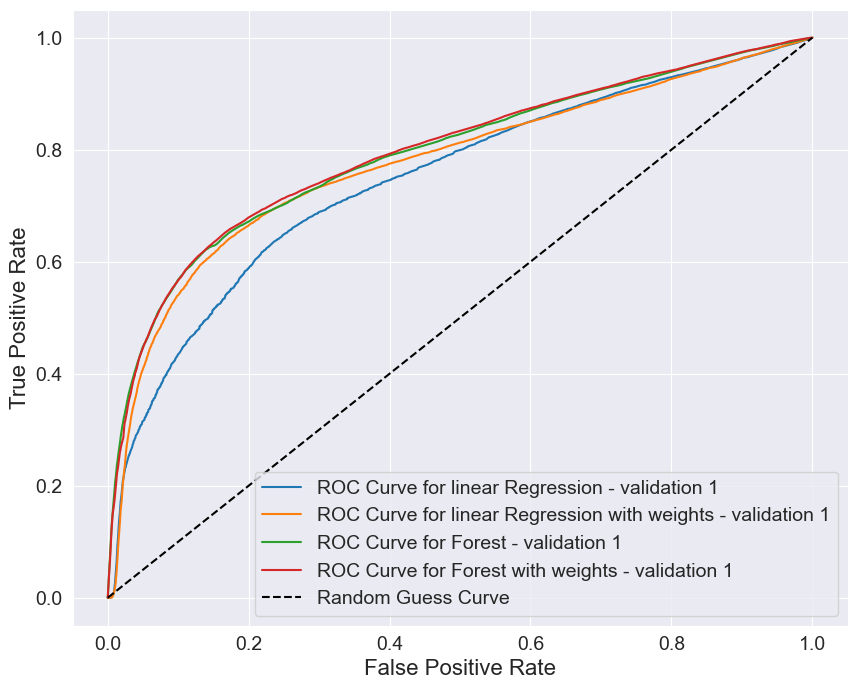

/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Model 0 2th validation 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    444597
           1       0.00      0.00      0.00     31531

    accuracy                           0.93    476128
   macro avg       0.47      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 



/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 2th validation 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    444597
           1       0.03      0.00      0.01     31531

    accuracy                           0.93    476128
   macro avg       0.48      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 

Model 2 2th validation 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86    444597
           1       0.17      0.69      0.28     31531

    accuracy                           0.76    476128
   macro avg       0.57      0.73      0.57    476128
weighted avg       0.92      0.76      0.82    476128
 

Model 3 2th validation 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97    444597
           1       0.61      0.13      0.21     31531

    accuracy                           0.94    476128
   macro avg       0.77      0.56      0.59    47

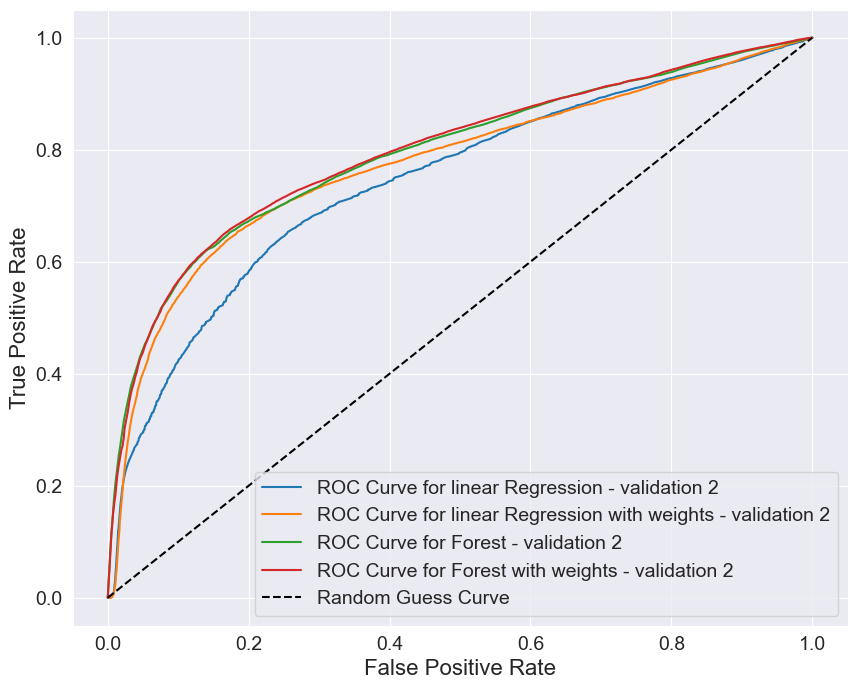

/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Model 0 3th validation 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    444597
           1       0.00      0.00      0.00     31531

    accuracy                           0.93    476128
   macro avg       0.47      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 



/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 3th validation 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    444597
           1       0.04      0.00      0.01     31531

    accuracy                           0.93    476128
   macro avg       0.49      0.50      0.48    476128
weighted avg       0.87      0.93      0.90    476128
 

Model 2 3th validation 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86    444597
           1       0.17      0.69      0.28     31531

    accuracy                           0.76    476128
   macro avg       0.57      0.73      0.57    476128
weighted avg       0.92      0.76      0.82    476128
 

Model 3 3th validation 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97    444597
           1       0.60      0.14      0.23     31531

    accuracy                           0.94    476128
   macro avg       0.77      0.57      0.60    47

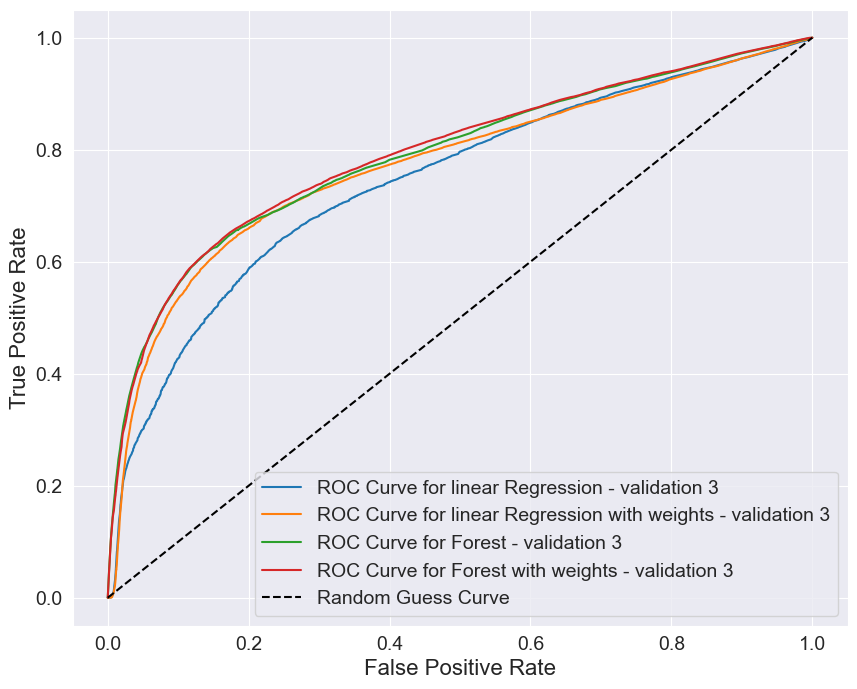

/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

Model 0 4th validation 
               precision    recall  f1-score   support

           0       0.93      1.00      0.97    444596
           1       0.00      0.00      0.00     31531

    accuracy                           0.93    476127
   macro avg       0.47      0.50      0.48    476127
weighted avg       0.87      0.93      0.90    476127
 



/opt/homebrew/Caskroom/miniforge/base/envs/ryol_general/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model 1 4th validation 
               precision    recall  f1-score   support

           0       0.93      0.99      0.96    444596
           1       0.02      0.00      0.00     31531

    accuracy                           0.93    476127
   macro avg       0.48      0.50      0.48    476127
weighted avg       0.87      0.93      0.90    476127
 

Model 2 4th validation 
               precision    recall  f1-score   support

           0       0.97      0.77      0.86    444596
           1       0.17      0.69      0.28     31531

    accuracy                           0.76    476127
   macro avg       0.57      0.73      0.57    476127
weighted avg       0.92      0.76      0.82    476127
 

Model 3 4th validation 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97    444596
           1       0.62      0.13      0.22     31531

    accuracy                           0.94    476127
   macro avg       0.78      0.56      0.59    47

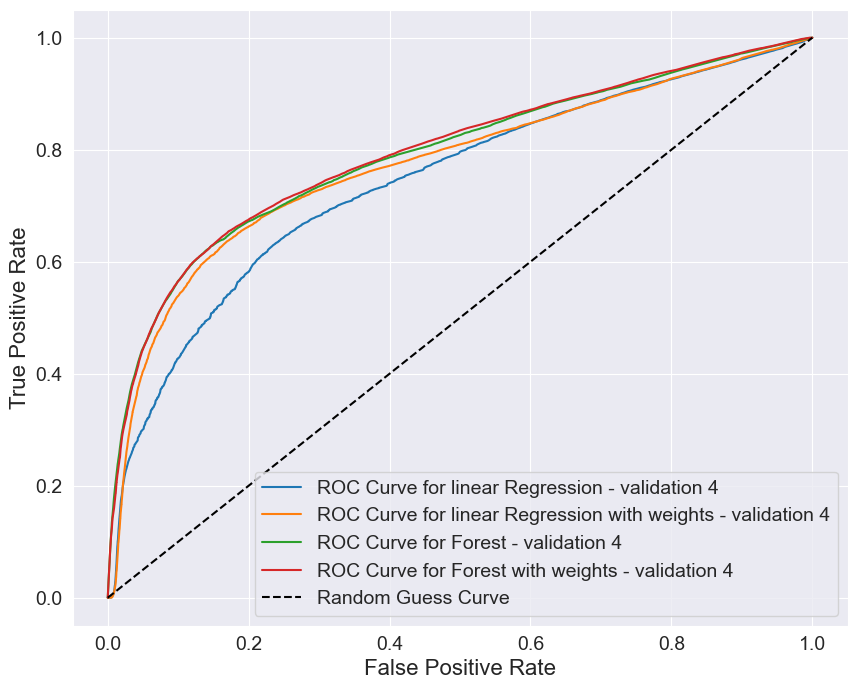

In [62]:
## Make a KFold object
kfold = StratifiedKFold(n_splits=5, 
                random_state=101,
                shuffle=True)

## This array will hold the mse for each model and split
f1s = np.zeros((5, 5))
recalls=np.zeros((5,5))

## sets a split counter
i = 0

## loop through the kfold here
for train_index, test_index in kfold.split(df_train,df_train.unnatural):
    ## cv training set
    df_tt = df_train.iloc[train_index]
    
    ## cv holdout set
    df_ho = df_train.iloc[test_index]
    
    ### Model 0 ###
    
    f1s[0,i] = f1_score(np.zeros(df_ho['unnatural'].size), df_ho['unnatural'], average = 'macro')
    recalls[0,i] = recall_score(df_ho['unnatural'].values, np.zeros(df_ho['unnatural'].size))
    print(f'Model 0 {i}th validation \n', classification_report(df_ho['unnatural'].values, np.zeros(df_ho['unnatural'].size)),'\n')

    ### Model 1 ###
    lr = LogisticRegression()

    lr.fit(df_tt[features],df_tt['unnatural'].values)

    pred1=lr.predict(df_ho[features])
    pred1_proba=lr.predict_proba(df_ho[features])[:,1]


    f1s[1,i] = f1_score(df_ho['unnatural'].values, pred1, average = 'macro')
    recalls[1,i] =recall_score(df_ho['unnatural'].values, pred1)
    print(f'Model 1 {i}th validation \n', classification_report(df_ho['unnatural'].values, pred1),'\n')

    ### Model 2 ###
    lr_pipe = make_pipeline(StandardScaler(),LogisticRegression(class_weight = 'balanced'))

    lr_pipe.fit(df_tt[features],df_tt['unnatural'].values)

    pred2=lr_pipe.predict(df_ho[features])
    pred2_proba=lr_pipe.predict_proba(df_ho[features])[:,1]
    f1s[2,i] = f1_score(df_ho['unnatural'].values, pred2, average = 'macro')
    recalls[2,i] = recall_score(df_ho['unnatural'].values, pred2)
    print(f'Model 2 {i}th validation \n', classification_report(df_ho['unnatural'].values, pred2),'\n')



    ### Model 3 ###
    forest = RandomForestClassifier(n_estimators=100,max_depth=8)
    
    forest.fit(df_tt[features],df_tt['unnatural'].values)
    
    pred3=forest.predict(df_ho[features])
    pred3_proba=forest.predict_proba(df_ho[features])[:,1]
    
    f1s[3,i] = f1_score(df_ho['unnatural'].values, pred3, average = 'macro')
    recalls[3,i] = recall_score(df_ho['unnatural'].values, pred3)
    print(f'Model 3 {i}th validation \n', classification_report(df_ho['unnatural'].values, pred3),'\n')

    print(forest.feature_importances_)

      ### Model 4 ###
    forest2 = RandomForestClassifier(n_estimators=100,max_depth=8,class_weight = 'balanced')

    forest2.fit(df_tt[features],df_tt['unnatural'].values)

    pred4=forest2.predict(df_ho[features])
    pred4_proba=forest2.predict_proba(df_ho[features])[:,1]

    f1s[4,i] = f1_score(df_ho['unnatural'].values, pred4, average = 'macro')
    recalls[4,i] = recall_score(df_ho['unnatural'].values, pred4)
    print(f'Model 4 {i}th validation \n', classification_report(df_ho['unnatural'].values, pred4),'\n')

    print(forest.feature_importances_)


    #ROC Curve for our best model yet
    fprs1, tprs1, cutoffs1 = roc_curve(df_ho['unnatural'].values,pred1_proba)
    fprs2, tprs2, cutoffs2 = roc_curve(df_ho['unnatural'].values,pred2_proba)
    fprs3, tprs3, cutoffs3 = roc_curve(df_ho['unnatural'].values,pred3_proba)
    fprs4, tprs4, cutoffs4 = roc_curve(df_ho['unnatural'].values,pred4_proba)

    plt.figure(figsize=(10,8))
    plt.plot(fprs1, tprs1, label =f'ROC Curve for linear Regression - validation {i}')
    plt.plot(fprs2, tprs2, label =f'ROC Curve for linear Regression with weights - validation {i}')
    plt.plot(fprs3, tprs3, label =f'ROC Curve for Forest - validation {i}')
    plt.plot(fprs4, tprs4, label =f'ROC Curve for Forest with weights - validation {i}')
    plt.plot([0,1],[0,1],'k--', label ='Random Guess Curve')

    plt.xlabel('False Positive Rate', fontsize =16)
    plt.ylabel('True Positive Rate', fontsize =16)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.legend(fontsize=14)

    plt.show()

    i = i + 1

In [63]:
print(np.mean(f1s, axis=1))
print(np.mean(recalls, axis=1))

[0.48287707 0.48390721 0.56767388 0.59238738 0.61495374]
[0.         0.0027909  0.68931528 0.13241572 0.6414259 ]


# Current Best Recall Score : 0.68931528

# Things to do:
    - Fine Tune a Model with grid search cv with cutoff points
    - Run Cramer's V on categorical features
